<a href="https://colab.research.google.com/github/hiydavid/tfdev_learning/blob/main/ZTM/notebooks/tfdev_01_neural_network_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01: Neural Network Regression

In this notebook we're going to cover:
* Architecture of a neural network regression model
* The input shapes and output shapes of a regression mode (features and labels)
* Creating custom data to view and fit
* Steps in modeling: creating a model, compiling a model, fitting a model, evaluating a model
* Different evaluation methods
* Saving and loading models

# Creating Sample Regression Data

In [2]:
# import tensorflow
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.8.0


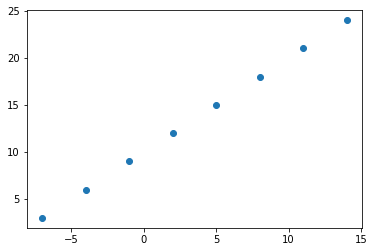

In [3]:
# create features & labels
X = np.array([-7., -4., -1., 2., 5., 8., 11., 14.])
y = np.array([3., 6., 9., 12., 15., 18., 21., 24.])
plt.scatter(X, y);

In [33]:
# turn data into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)

X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

# Steps in Modeling with TensorFlow

1. **Creating a model**: define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model**: define the loss function (which tells our model how wrong it is), the optimizer (how to improve the pattern it is learning), and the evaluation metrics (how is our model performing).
3. **Fitting a model**: letting the model try to find patterns between X & y (features and labels).


In [34]:
# set random seed
tf.random.set_seed(42)

In [35]:
# use sample data to buiild, compile, and fit
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 0s 468ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 9ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 7ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 8ms/step - loss: 10.9748 - mae: 10.9748


In [36]:
# try and make prediction
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

# Improving a Model

1. **When creating a model**: here we might add more **layers**, increase the number of **neurons**, change the **activation function** of each layer.
2. **When compiling a model**: here we might change the **optimizer**, change the **learning rate** of the optimizer.
3. **When fitting a model**: here we might fit a model for more **epochs**, or on more **data** to learn from.

In [37]:
# experiment 1: expand number of epochs
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=['mae']
)

model.fit(tf.expand_dims(X, axis=1), y, epochs=100, verbose=1)

Epoch 1/100
1/1 [==============================] - 0s 350ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 7ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 7ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 6ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 8ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 8ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 

In [39]:
# now check the prediction
y_pred = model.predict([17.])
y_pred

array([[29.739855]], dtype=float32)